<a href="https://colab.research.google.com/github/steveLim0928/Foundation-in-ML/blob/main/cw_part_3_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
%matplotlib inline  
import numpy as np # numerical computation packages in python
import matplotlib.pyplot as plt # plotting routines
import operator
# plotting library

from sklearn.model_selection import train_test_split

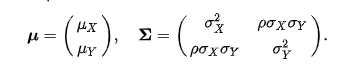

<Figure size 432x432 with 0 Axes>

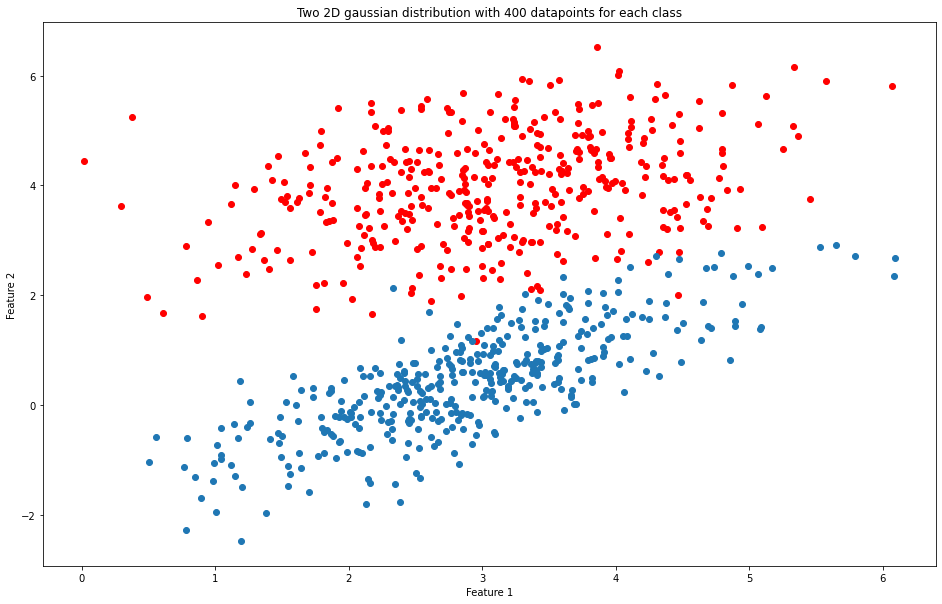

In [4]:
# define 2D gaussain distributions

fig = plt.figure(figsize=(6,6))

np.random.seed(3)

ma = [3.1, 3.9]
mb = [2.8, 0.3]

sa = np.array([[1, 0.4],[0.4, 1]])
sb = np.array([[0.9, 0.7],[0.7, 0.9]])
#print(sa)
#print(sb)

# no. of data
na = 400
nb = 400

# generated data
xa = np.random.multivariate_normal(ma,sa,na)
xb = np.random.multivariate_normal(mb,sb,nb)

# class label
ya = np.zeros(na, dtype=int)
yb = np.ones(nb, dtype=int)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(16,10))
ax.scatter(xa[:,0],xa[:,1], c='r')
ax.scatter(xb[:,0],xb[:,1])
ax.set_title("Two 2D gaussian distribution with 400 datapoints for each class")
ax.set_ylabel('Feature 2')
ax.set_xlabel('Feature 1')
plt.rcParams['font.size'] = '15'

**GRAPH 1**

Plotting this histogram of the 2D data down onto 1D using 2 randomly chosen weights.

The weights are choosen to have 2 extremes. Overlap and not overlap

Text(0.5, 0, 'y_c')

<Figure size 432x432 with 0 Axes>

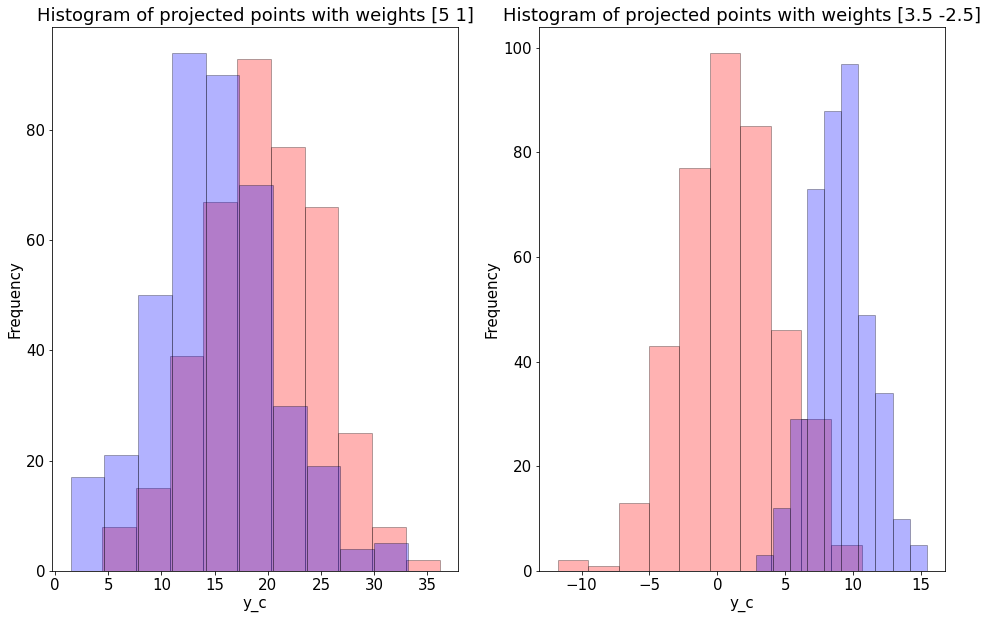

In [5]:
# weights choice

fig = plt.figure(figsize=(6,6))

weights1 = np.array([5, 1])
weights1 = np.reshape(weights1, (2, 1))
weights2 = np.array([3.5, -2.5])
weights2 = np.reshape(weights2, (2, 1))

ya1 = np.dot(xa,weights1)
yb1 = np.dot(xb,weights1)
ya2 = np.dot(xa,weights2)
yb2 = np.dot(xb,weights2)

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(16,10))
plt.rcParams['font.size'] = '15'

ax[0].hist(ya1,color='r',alpha=0.3,ec='black')
ax[0].hist(yb1,color='b',alpha=0.3,ec='black')
ax[0].set_title("Histogram of projected points with weights [5 1]")
ax[0].set_ylabel('Frequency')
ax[0].set_xlabel('y_c')

ax[1].hist(ya2,color='r',alpha=0.3,ec='black')
ax[1].hist(yb2,color='b',alpha=0.3,ec='black')
ax[1].set_title("Histogram of projected points with weights [3.5 -2.5]")
ax[1].set_ylabel('Frequency')
ax[1].set_xlabel('y_c')

[[-1.3036623 ]
 [ 2.61854814]]


(array([  3.,  10.,  25.,  56.,  88., 104.,  64.,  34.,  14.,   2.]),
 array([-8.04038721, -6.98418279, -5.92797838, -4.87177396, -3.81556955,
        -2.75936513, -1.70316072, -0.6469563 ,  0.40924812,  1.46545253,
         2.52165695]),
 <a list of 10 Patch objects>)

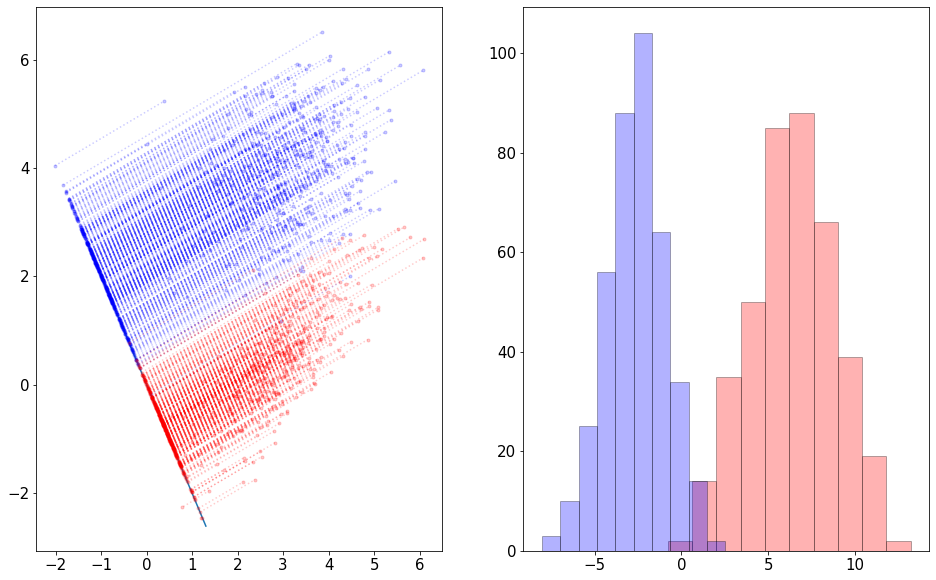

In [6]:
# https://stackoverflow.com/questions/62610782/fishers-linear-discriminant-in-python

mu_a, mu_b = xa.mean(axis=0).reshape(-1,1), xb.mean(axis=0).reshape(-1,1)
Sw = np.cov(xa.T) + np.cov(xb.T)
inv_S = np.linalg.inv(Sw)
res = inv_S.dot(mu_a-mu_b)  # the trick
print(res)

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(16,10))
ax[0].plot([-res[0], res[0]], [-res[1], res[1]]) # this is the solution

r = res.reshape(2,)
n2 = np.linalg.norm(r)**2
for pt in xa:
    prj = r * r.dot(pt) / n2
    ax[0].plot([prj[0], pt[0]], [prj[1], pt[1]], 'b.:', alpha=0.2)
for pt in xb:
    prj = r * r.dot(pt) / n2
    ax[0].plot([prj[0], pt[0]], [prj[1], pt[1]], 'r.:', alpha=0.2)

ya7 = np.dot(xa,res)
yb7 = np.dot(xb,res)
ax[1].hist(ya7,color='r',alpha=0.3,ec='black')
ax[1].hist(yb7,color='b',alpha=0.3,ec='black')


(2, 1)
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


(-1.0, 7.0)

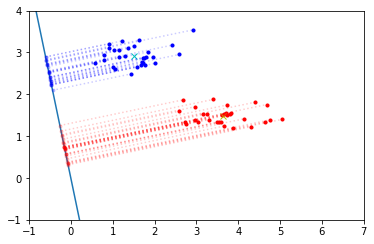

In [ ]:
a = np.random.multivariate_normal((1.5, 3), [[0.5, 0], [0, .05]], 30)
b = np.random.multivariate_normal((4, 1.5), [[0.5, 0], [0, .05]], 30)
plt.plot(a[:,0], a[:,1], 'b.', b[:,0], b[:,1], 'r.')
mu_a, mu_b = a.mean(axis=0).reshape(-1,1), b.mean(axis=0).reshape(-1,1)
Sw = np.cov(a.T) + np.cov(b.T)
inv_S = np.linalg.inv(Sw)
res = inv_S.dot(mu_a-mu_b)  # the trick
####
# more general solution
#
# Sb = (mu_a-mu_b)*((mu_a-mu_b).T)
# eig_vals, eig_vecs = np.linalg.eig(inv_S.dot(Sb))
# res = sorted(zip(eig_vals, eig_vecs), reverse=True)[0][1] # take only eigenvec corresponding to largest (and the only one) eigenvalue
# res = res / np.linalg.norm(res)

plt.plot([-res[0], res[0]], [-res[1], res[1]]) # this is the solution
plt.plot(mu_a[0], mu_a[1], 'cx')
plt.plot(mu_b[0], mu_b[1], 'yx')
plt.gca().axis('square')

# let's project data point on it
print(np.shape(res))
r = res.reshape(2,)
n2 = np.linalg.norm(r)**2
for pt in a:
    prj = r * r.dot(pt) / n2
    plt.plot([prj[0], pt[0]], [prj[1], pt[1]], 'b.:', alpha=0.2)
for pt in b:
    prj = r * r.dot(pt) / n2
    plt.plot([prj[0], pt[0]], [prj[1], pt[1]], 'r.:', alpha=0.2)
plt.ylim(-1,4)
plt.xlim(-1,7)

**GRAPH 2**

[1 2][3 4]

magnitude diff between 1 and 2 large, data spread to more x axis. cover larger area. small = cover less area

same for 3 and 4

1 and 2 changes the width of x axis. 3 and 4 changes the width spread of y axis

histogram not able to see if it increases in either side. just can see overall changes. because now projected into 1D. Can only see overlap is more severe

Text(0.5, 100.00000000000011, 'Feature 1')

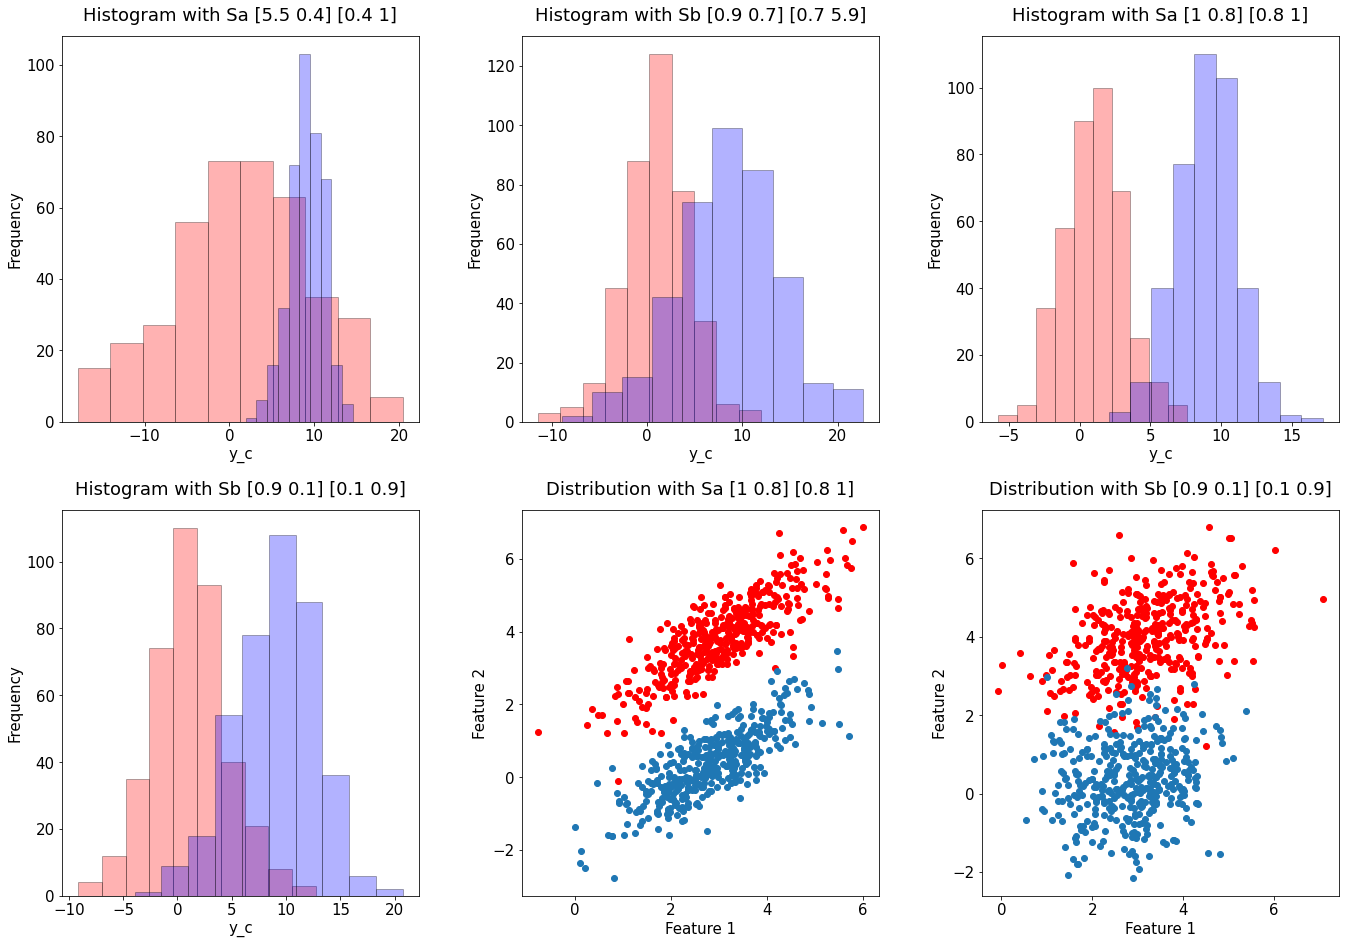

In [14]:
# alter Sa and Sb

fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(20,14))
plt.tight_layout(pad=4)

#ax[0][0].hist(ya2,color='r',alpha=0.3,ec='black')
#ax[0][0].hist(yb2,color='b',alpha=0.3,ec='black')

## CHANGES TO SB
sa3 = np.array([[1, 0.4],[0.4, 1]])
sb3 = np.array([[0.9, 0.7],[0.7, 5.9]])
# generated data
xa3 = np.random.multivariate_normal(ma,sa3,na)
xb3 = np.random.multivariate_normal(mb,sb3,nb)
ya3 = np.dot(xa3,weights2)
yb3 = np.dot(xb3,weights2)
ax[0][1].hist(ya3,color='r',alpha=0.3,ec='black')
ax[0][1].hist(yb3,color='b',alpha=0.3,ec='black')
ax[0][1].set_title("Histogram with Sb [0.9 0.7] [0.7 5.9]", pad=15)
ax[0][1].set_ylabel('Frequency')
ax[0][1].set_xlabel('y_c')


## Change magnitude PLOT THIS FOR BOTH
sa4 = np.array([[5.5, 0.4],[0.4, 1]])
sb4 = np.array([[0.9, 0.7],[0.7, 0.9]])
# generated data
xa4 = np.random.multivariate_normal(ma,sa4,na)
xb4 = np.random.multivariate_normal(mb,sb4,nb)
ya4 = np.dot(xa4,weights2)
yb4 = np.dot(xb4,weights2)
ax[0][0].hist(ya4,color='r',alpha=0.3,ec='black')
ax[0][0].hist(yb4,color='b',alpha=0.3,ec='black')
ax[0][0].set_title("Histogram with Sa [5.5 0.4] [0.4 1]", pad=15)
ax[0][0].set_ylabel('Frequency')
ax[0][0].set_xlabel('y_c')

## CAHNGES TO 2 and 3 TERM PLOT BOTH
sa5 = np.array([[1, 0.8],[0.8, 1]])
sb5 = np.array([[0.9, 0.7],[0.7, 0.9]])
# generated data
xa5 = np.random.multivariate_normal(ma,sa5,na)
xb5 = np.random.multivariate_normal(mb,sb5,nb)
ya5 = np.dot(xa5,weights2)
yb5 = np.dot(xb5,weights2)
ax[0][2].hist(ya5,color='r',alpha=0.3,ec='black')
ax[0][2].hist(yb5,color='b',alpha=0.3,ec='black')
ax[0][2].set_title("Histogram with Sa [1 0.8] [0.8 1]", pad=15)
ax[0][2].set_ylabel('Frequency')
ax[0][2].set_xlabel('y_c')

sa6 = np.array([[1, 0.4],[0.4, 1]])
sb6 = np.array([[0.9, 0.1],[0.1, 0.9]])
# generated data
xa6 = np.random.multivariate_normal(ma,sa6,na)
xb6 = np.random.multivariate_normal(mb,sb6,nb)
ya6 = np.dot(xa6,weights2)
yb6 = np.dot(xb6,weights2)
ax[1][0].hist(ya6,color='r',alpha=0.3,ec='black')
ax[1][0].hist(yb6,color='b',alpha=0.3,ec='black')
ax[1][0].set_title("Histogram with Sb [0.9 0.1] [0.1 0.9]", pad=15)
ax[1][0].set_ylabel('Frequency')
ax[1][0].set_xlabel('y_c')

ax[1][1].scatter(xa5[:,0],xa5[:,1], c='r')
ax[1][1].scatter(xb5[:,0],xb5[:,1])
ax[1][1].set_title("Distribution with Sa [1 0.8] [0.8 1]", pad=15)
ax[1][1].set_ylabel('Feature 2')
ax[1][1].set_xlabel('Feature 1')

ax[1][2].scatter(xa6[:,0],xa6[:,1], c='r')
ax[1][2].scatter(xb6[:,0],xb6[:,1])
ax[1][2].set_title("Distribution with Sb [0.9 0.1] [0.1 0.9]", pad=15)
ax[1][2].set_ylabel('Feature 2')
ax[1][2].set_xlabel('Feature 1')

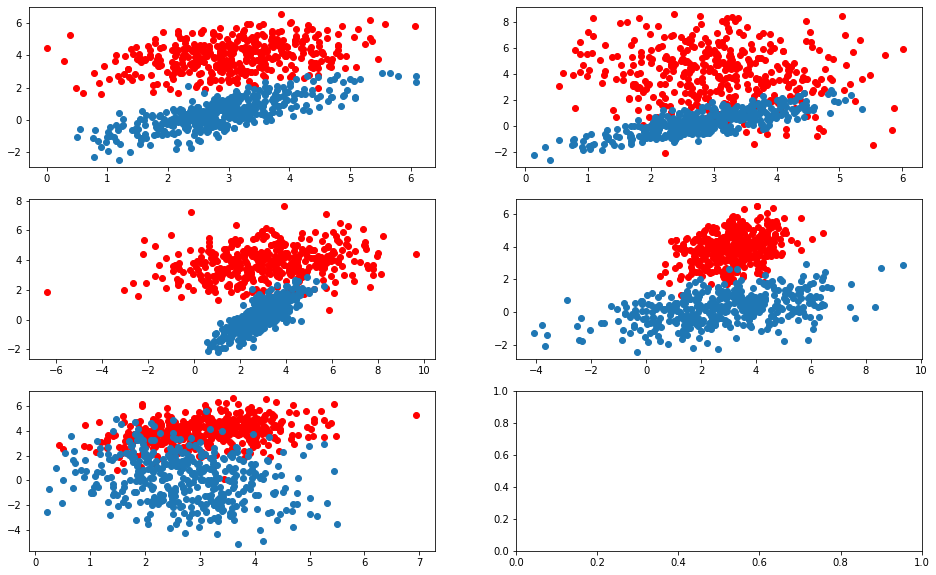

In [ ]:
fig, ax = plt.subplots(nrows=3, ncols=2, figsize=(16,10))

ax[0][0].scatter(xa[:,0],xa[:,1], c='r')
ax[0][0].scatter(xb[:,0],xb[:,1])

ax[0][1].scatter(xa3[:,0],xa3[:,1], c='r')
ax[0][1].scatter(xb3[:,0],xb3[:,1])

ax[1][0].scatter(xa4[:,0],xa4[:,1], c='r')
ax[1][0].scatter(xb4[:,0],xb4[:,1])

ax[1][1].scatter(xa5[:,0],xa5[:,1], c='r')
ax[1][1].scatter(xb5[:,0],xb5[:,1])

ax[2][0].scatter(xa6[:,0],xa6[:,1], c='r')
ax[2][0].scatter(xb6[:,0],xb6[:,1])

**GRAPH 3**

240
-0.5000000000000004 -0.8660254037844384
[ 0.3660254 -1.3660254]


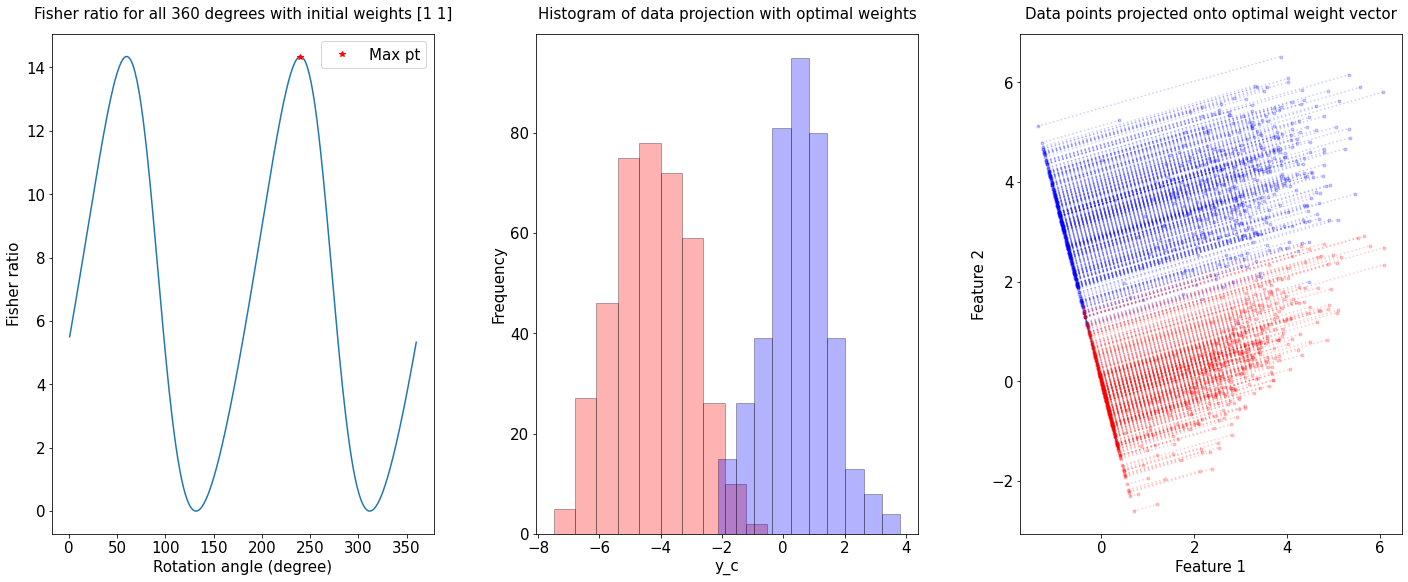

In [ ]:
def fisher_ratio(mean_a, mean_b, div_a, div_b, len_a, len_b):
  len_t = len_a + len_b
  return (mean_a - mean_b)**2 / ((len_a/len_t)*div_a + (len_b/len_t)*div_b)

# inital weights
w_init = [1, 1]
fisher_ratio_list = []
rot_theta = np.linspace(0,360,361)

for i in rot_theta:
  theta = np.radians(i)
  cos_val = np.cos(theta)
  sin_val = np.sin(theta)
  R = np.array([[cos_val, -sin_val], [sin_val, cos_val]])
  w_theta = np.dot(R,w_init)
  w_theta = np.reshape(w_theta, (2, 1))

  ya_theta = np.dot(xa,w_theta)
  yb_theta = np.dot(xb,w_theta)
  mean_a = np.mean(ya_theta)
  mean_b = np.mean(yb_theta)
  div_a = (np.std(ya_theta))**2
  div_b = (np.std(ya_theta))**2
  fisher_ratio_list.append(fisher_ratio(mean_a, mean_b, div_a, div_b, na, nb))

# get best weights

max_idx = np.argmax(fisher_ratio_list)
print(max_idx)
max_theta = np.radians(rot_theta[max_idx])
cos_val = np.cos(max_theta)
sin_val = np.sin(max_theta)
print(cos_val, sin_val)
R = np.array([[cos_val, -sin_val], [sin_val, cos_val]])

w_best = np.dot(R,w_init)

print(w_best)

fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(21,9))
plt.tight_layout(pad=4)

ya7 = np.dot(xa,w_best)
yb7 = np.dot(xb,w_best)
ax[1].hist(ya7,color='r',alpha=0.3,ec='black')
ax[1].hist(yb7,color='b',alpha=0.3,ec='black')
ax[1].set_title("Histogram of data projection with optimal weights", pad=15, size = 15)
ax[1].set_ylabel('Frequency')
ax[1].set_xlabel('y_c')

ax[0].plot(rot_theta[1:], fisher_ratio_list[1:])
ax[0].plot(rot_theta[np.argmax(fisher_ratio_list)], fisher_ratio_list[np.argmax(fisher_ratio_list)], 'r*', label="Max pt")
ax[0].legend()
ax[0].set_title("Fisher ratio for all 360 degrees with initial weights [1 1]", pad=15, size = 15)
ax[0].set_ylabel('Fisher ratio')
ax[0].set_xlabel('Rotation angle (degree)')
ax[2].plot([-w_best[0], w_best[0]], [-w_best[1], w_best[1]]) # this is the solution
ax[2].set_title("Data points projected onto optimal weight vector", pad=15, size = 15)
ax[2].set_ylabel('Feature 2')
ax[2].set_xlabel('Feature 1')

r = w_best.reshape(2,)
n2 = np.linalg.norm(r)**2
for pt in xa:
    prj = r * r.dot(pt) / n2
    ax[2].plot([prj[0], pt[0]], [prj[1], pt[1]], 'b.:', alpha=0.2)
for pt in xb:
    prj = r * r.dot(pt) / n2
    ax[2].plot([prj[0], pt[0]], [prj[1], pt[1]], 'r.:', alpha=0.2)


Optimal direction: 
[-0.61995042  1.27108673]


(array([  3.,  10.,  24.,  54.,  88., 106.,  65.,  33.,  15.,   2.]),
 array([-3.8875512 , -3.37339177, -2.85923235, -2.34507292, -1.83091349,
        -1.31675407, -0.80259464, -0.28843521,  0.22572422,  0.73988364,
         1.25404307]),
 <a list of 10 Patch objects>)

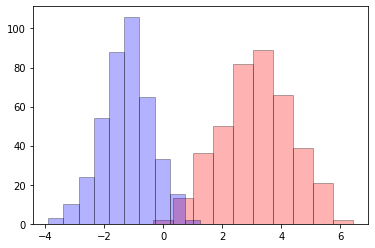

In [ ]:
def fisherRatio(mean_a, mean_b, std_a, std_b, data_a, data_b, data): 
    return (mean_a - mean_b)**2/((len(data_a)/len(data))*std_a + (len(data_b)/len(data))*std_b)
    
def unbalancedFisherRatio(mean_a, mean_b, std_a, std_b):
    return (mean_a - mean_b)**2/(std_a + std_b)

# Direction w
w0 = [1, 1]
fisherArray = []
unbalancedArray = []
angles = np.linspace(0.0, 360.0, num=361)
optimalw0 = [0.0, 0.0]

def rotationVectors():
    for i in range(0, 361):
        theta = np.radians(i)
        cos = np.cos(theta)
        sin = np.sin(theta)
        R = np.array(((cos, -sin), (sin, cos)))
        wTheta = np.matmul(R, w0)

        y_a = np.matmul(wTheta, xa.T)
        y_b = np.matmul(wTheta, xb.T)
        mean_a = np.mean(y_a)
        mean_b = np.mean(y_b)
        std_a = np.std(y_a)**2
        std_b = np.std(y_b)**2
        y_all = np.concatenate((y_a, y_b))
        fisherArray.insert(i, fisherRatio(mean_a, mean_b, std_a, std_b, y_a, y_b, y_all))
        unbalancedArray.insert(i, unbalancedFisherRatio(mean_a, mean_b, std_a, std_b))

rotationVectors()

def optimalWeightVector(fisherArray):
    theta = np.radians(np.argmax(fisherArray))
    cos = np.cos(theta)
    sin = np.sin(theta)
    R = np.array(((cos, -sin), (sin, cos)))
    
    return np.matmul(R, w0)
    
optimalw0 = optimalWeightVector(fisherArray)

print("Optimal direction: ")
print(optimalw0)

ya7 = np.dot(xa,optimalw0)
yb7 = np.dot(xb,optimalw0)
plt.hist(ya7,color='r',alpha=0.3,ec='black')
plt.hist(yb7,color='b',alpha=0.3,ec='black')

60
0.5000000000000001 0.8660254037844386
[-0.3660254  1.3660254]


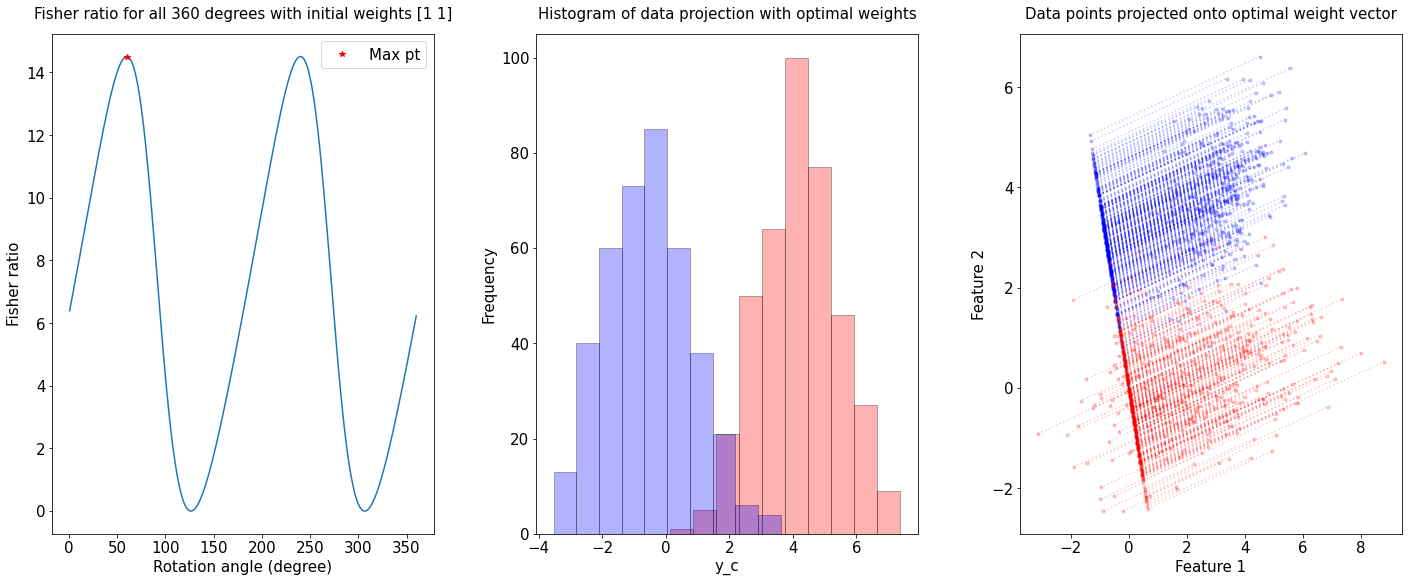

In [ ]:
def fisher_ratio(mean_a, mean_b, div_a, div_b, len_a, len_b):
  len_t = len_a + len_b
  return (mean_a - mean_b)**2 / ((len_a/len_t)*div_a + (len_b/len_t)*div_b)

# inital weights
w_init = [1, 1]
fisher_ratio_list = []
rot_theta = np.linspace(0,360,361)

for i in rot_theta:
  theta = np.radians(i)
  cos_val = np.cos(theta)
  sin_val = np.sin(theta)
  R = np.array([[cos_val, -sin_val], [sin_val, cos_val]])
  w_theta = np.dot(R,w_init)
  w_theta = np.reshape(w_theta, (2, 1))

  ya_theta = np.dot(xa5,w_theta)
  yb_theta = np.dot(xb5,w_theta)
  mean_a = np.mean(ya_theta)
  mean_b = np.mean(yb_theta)
  div_a = (np.std(ya_theta))**2
  div_b = (np.std(ya_theta))**2
  fisher_ratio_list.append(fisher_ratio(mean_a, mean_b, div_a, div_b, na, nb))

# get best weights

max_idx = np.argmax(fisher_ratio_list)
print(max_idx)
max_theta = np.radians(rot_theta[max_idx])
cos_val = np.cos(max_theta)
sin_val = np.sin(max_theta)
print(cos_val, sin_val)
R = np.array([[cos_val, -sin_val], [sin_val, cos_val]])

w_best = np.dot(R,w_init)

print(w_best)

fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(21,9))
plt.tight_layout(pad=4)

ya7 = np.dot(xa5,w_best)
yb7 = np.dot(xb5,w_best)
ax[1].hist(ya7,color='r',alpha=0.3,ec='black')
ax[1].hist(yb7,color='b',alpha=0.3,ec='black')
ax[1].set_title("Histogram of data projection with optimal weights", pad=15, size = 15)
ax[1].set_ylabel('Frequency')
ax[1].set_xlabel('y_c')

ax[0].plot(rot_theta[1:], fisher_ratio_list[1:])
ax[0].plot(rot_theta[np.argmax(fisher_ratio_list)], fisher_ratio_list[np.argmax(fisher_ratio_list)], 'r*', label="Max pt")
ax[0].legend()
ax[0].set_title("Fisher ratio for all 360 degrees with initial weights [1 1]", pad=15, size = 15)
ax[0].set_ylabel('Fisher ratio')
ax[0].set_xlabel('Rotation angle (degree)')
ax[2].plot([-w_best[0], w_best[0]], [-w_best[1], w_best[1]]) # this is the solution
ax[2].set_title("Data points projected onto optimal weight vector", pad=15, size = 15)
ax[2].set_ylabel('Feature 2')
ax[2].set_xlabel('Feature 1')

r = w_best.reshape(2,)
n2 = np.linalg.norm(r)**2
for pt in xa5:
    prj = r * r.dot(pt) / n2
    ax[2].plot([prj[0], pt[0]], [prj[1], pt[1]], 'b.:', alpha=0.2)
for pt in xb5:
    prj = r * r.dot(pt) / n2
    ax[2].plot([prj[0], pt[0]], [prj[1], pt[1]], 'r.:', alpha=0.2)